<a href="https://colab.research.google.com/github/cequintero/graph/blob/main/Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# importacion de datos desde repo de GitHub
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/cequintero/graph/main/jonramos_Adyacencia.csv'
adya = pd.read_csv (url, header=None)

url2 = 'https://raw.githubusercontent.com/cequintero/graph/main/jonramos_Grafo01.csv'
coord = pd.read_csv (url2, header=None)

# El conjunto de datos ahora se almacena en un marco de datos de Pandas

# Posteriromente se procesa para hacer mas facil su uso

coordenadas, adyacencia = [], []

for x in coord[0]:
  coordenadas.append(x.split(";"))

for x in adya[0]:
  adyacencia.append(x.split(";"))


In [26]:
import networkx as nx

# generamos un diccionario para las coordenadas
# 0 -> nombre ej: A ; 1 -> x; 2 -> y 
nodos = dict((x[0], (int(x[1]), int(x[2]))) for x in coordenadas)

# Inicializa un grafo vacio
G = nx.Graph()

# añadir los nodos al grafo
for key in nodos:
    G.add_node(key)


In [27]:
edgeList = []

# recorre la matriz de adyacencia
for row, a in enumerate(adyacencia):
    for column, c in enumerate(a):
        # 1 => nodos conectados.
        if c == '1':
          # Por cada 1 se añade el valor de la letra en esa fila y columna como pareja de datos en la lista de aristas
          edgeList.append((a[0], adyacencia[column-1][0]))
        else:
            continue

# Añadir la lista de aristas al grafo
G.add_edges_from(edgeList)


In [28]:
import math

#lista de pesos
weightedList = []

# Se extraen las llaves del diccionario de nodos en una lista para poder ser iteradas de manera mas comoda
llaves = list(nodos.keys())
count = 0

# Se recorre las llaves de tal manera que se puedan evaluar todos los nodos para verificar si estan conectados o no
for i in range(len(llaves)):
    for j in range(len(llaves)-1):
        aux = j+1
        # Se comprueba si esa pareja de nodos estan conectados (Es decir. Si pertenecen a la lista de aristas)
        if (llaves[i], llaves[aux]) in edgeList:

            # Se extraen los valores de las llaves (en este caso las coordenadas de ese par de nodos)
            n1 = nodos.get(llaves[i])
            n2 = nodos.get(llaves[aux])


            # En este caso el peso de las aristas es la distancia entre esos puntos.
            # Con lo cual se aplica la formula de distancia entre 2 puntos para hallar este peso

            # Formula: √(〖(x2-x1)〗^2+〖(y2-y1)〗^2 )
            peso = math.sqrt(
                math.pow((n2[0]-n1[0]), 2)+math.pow((n2[1]-n1[1]), 2))

            # Se añade el elemento a la lista de acuerdo al formato de antes.
            weightedList.append(
                ((edgeList[count])[0], (edgeList[count])[1], math.ceil(peso)))  # Format es para que solo se utilicen dos puntos decimales
            count += 1
        else:
            continue
        aux += 1

# Se añade la lista de pesos al grafo
G.add_weighted_edges_from(weightedList)


In [29]:
# Poner los pesos como etiquetas de las aristas
labels = nx.get_edge_attributes(G, 'weight')
labels2 = {}  
for nodo in nodos:
  labels2[nodo] = nodo

import matplotlib.pyplot as plt

color_map = []
for node in G:
    if node == 'J':
        color_map.append('red')
    else: 
        color_map.append('blue')

#plt.figure(figsize=(20,12))
# Dibujar los nodos, aristas y etiquetas (pesos)
#nx.draw_networkx_nodes(G, nodos, node_color = color_map)
#nx.draw_networkx_edges(G, nodos, G.edges)
#nx.draw_networkx_edge_labels(G, nodos, edge_labels=labels)

#nx.draw_networkx_labels(G,nodos,labels2,font_size=12,font_color='#fff')
# Imprimir en pantalla

#plt.show()

In [30]:
visitados = []


def visitar(nodo):
  visitados.append(nodo)


marked = [False] * (len(list(G))+1)
vecinos = []


def bfs(G, V):
  v = llaves.index(V)
  queue = [v]
  while len(queue) > 0:
    v = queue.pop(0)
    if not marked[v]:
      visitar(v)
      marked[v] = True
      vecinos = list(G.neighbors(llaves[v]))
      for w in vecinos:
          if not marked[llaves.index(w)]:
              queue.append(llaves.index(w))


bfs(G, 'J')

recorrido = []
for x in visitados:
    recorrido.append(llaves[x])

a = set(llaves)
b = set(recorrido)

if a == b:
    print('El grafo es completamente conectado')
else:
    print('El grafo no escompletamente conectado!!!')

print('Los nodos conectados son: ')
print(recorrido)

G2 = nx.Graph()





El grafo es completamente conectado
Los nodos conectados son: 
['J', 'D', 'G', 'K', 'M', 'N', 'O', 'Q', 'B', 'C', 'E', 'F', 'H', 'A', 'I', 'L', 'P', 'R', 'T', 'S']


# MINIMUM SPANNING TREE (kruskal)

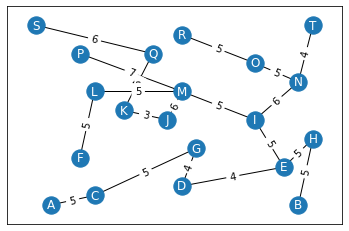

In [31]:

numeros = []
for x in range(20):
    numeros.append(x)

c = 0
for y in weightedList:
    y = list(y)
    y[0] = llaves.index(y[0])
    y[1] = llaves.index(y[1])
    weightedList[c] = (y[0], y[1], y[2])
    c += 1


position = {}
values = list(nodos.values())
c = 0
for h in nodos:
    position[c] = nodos[h]
    c += 1

D = nx.Graph()
D.add_nodes_from(numeros)
D.add_weighted_edges_from(weightedList)

T = nx.minimum_spanning_tree(D)

labels = nx.get_edge_attributes(T, 'weight')

nx.draw_networkx_nodes(T, position, T.nodes)
nx.draw_networkx_edges(T, position, T.edges)
nx.draw_networkx_edge_labels(G, position, labels)
nx.draw_networkx_labels(G, nodos, font_color='#fff')
plt.show()
